In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd 'drive/'

/content/drive


In [3]:
cd 'My Drive/'

/content/drive/My Drive


In [4]:
cd '9517Task200'

/content/drive/My Drive/9517Task200


In [5]:
ls

data/                        Test/          unet_model.py    vessel_unet_2.hdf5
data_generator.py            test_data.py   unetres/
__pycache__/                 train_data.py  unetres_2/
Task2_success20191117.ipynb  Training/      Untitled1.ipynb


In [6]:
!pip install gif2numpy

  Created wheel for gif2numpy: filename=gif2numpy-1.3-py2.py3-none-any.whl size=8387 sha256=ed9715ae35a304f1c9ee3686c4260f9b7417ac9934ed29d85ed1f0f9703312e9
  Stored in directory: /root/.cache/pip/wheels/75/26/83/f9c9bda0654ff9788bae2d14fd074b61e1b72824a312103dfe
  Created wheel for kaitaistruct: filename=kaitaistruct-0.8-py2.py3-none-any.whl size=4924 sha256=f8f0ed4dc49e5c1d9fceebd3b9452ad829f1ad98481d8ef34ba450349f24787b
  Stored in directory: /root/.cache/pip/wheels/13/96/bf/b0b85f189392528465d57eefa22848ca333703d585700b86e2
Successfully built gif2numpy kaitaistruct


In [0]:
!python "train_data.py"

Using TensorFlow backend.
Finsihed Loading Data






2019-11-18 09:41:32.900660: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-11-18 09:41:32.901093: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2d62bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2019-11-18 09:41:32.901129: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2019-11-18 09:41:32.906438: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-11-18 09:41:33.054015: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-11-18 09:41:33.054862: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2d62d80 initialized for platform CUDA (this does not guarante

In [8]:
from data_generator import trainGenerator, testGenerator
import numpy as np
from unet_model import set_model, second_model
from keras.callbacks import TensorBoard, ModelCheckpoint
import os
import cv2
import matplotlib.pyplot as plt
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, confusion_matrix


test_image_path = "data/test/image/"
test_label_path = "data/test/label/"
img_size = (512,512)
img_shape = (512,512,1)

test_data = testGenerator(test_image_path,test_label_path,img_size,img_shape)

# get the test data
test_image = np.asarray(test_data[0])
test_label = np.asarray(test_data[1])

Using TensorFlow backend.


Finsihed Loading Data
['01_test.tif', '02_test.tif', '03_test.tif', '04_test.tif', '05_test.tif', '06_test.tif', '07_test.tif']
['01_manual1.tif', '02_manual1.tif', '03_manual1.tif', '04_manual1.tif', '05_manual1.tif', '06_manual1.tif', '07_manual1.tif']














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/content/drive/My Drive/9517Task200/unet_model.py:162: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`
  model = Model(input=inputs, output=output_layer)


[TEST INFO]: Loading the training result
[TEST INFO]: Finished Loading second model


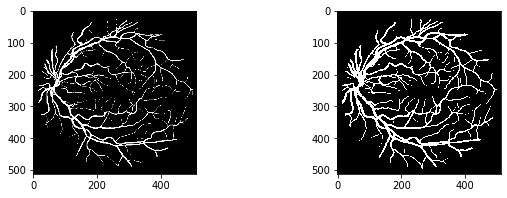

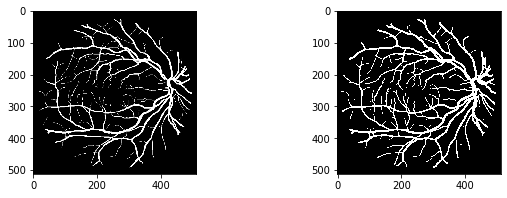

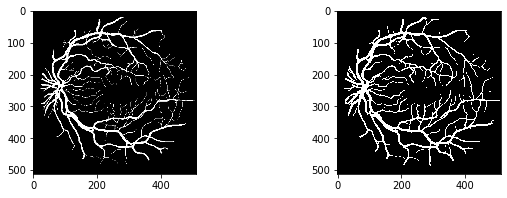

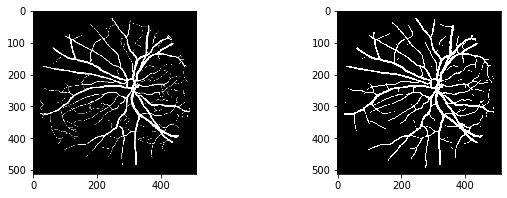

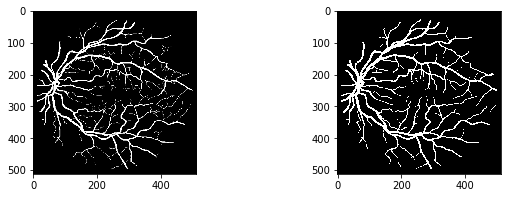

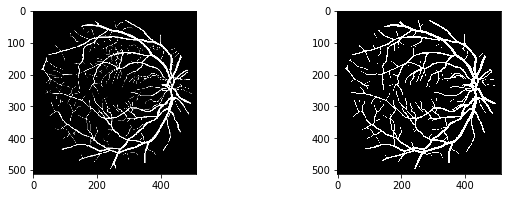

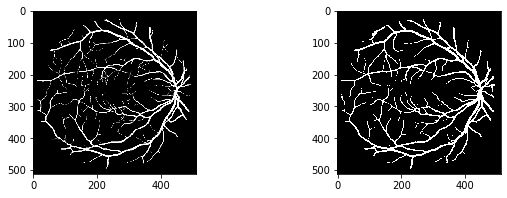

In [9]:
#############################################################
##### This is the first model
#############################################################
# model = set_model()
# # identify the training result and load it
# if os.path.isfile('vessel_unet.hdf5'):
#     print("[TEST INFO]: Loading the training result")
#     model.load_weights('vessel_unet.hdf5')
# model_checkpoint = ModelCheckpoint('vessel_unet.hdf5', monitor='val_acc', verbose=1, save_best_only=True)
# print("[TEST INFO]: Finished Loading")
######################################################################################################################

#############################################################
##### This is the second model
#############################################################
model = second_model()
# identify the training result and load it
if os.path.isfile('vessel_unet_2.hdf5'):
    print("[TEST INFO]: Loading the training result")
    model.load_weights('vessel_unet_2.hdf5')
model_checkpoint = ModelCheckpoint('vessel_unet_2.hdf5', monitor='val_acc', verbose=1, save_best_only=True)
print("[TEST INFO]: Finished Loading second model")
######################################################################################################################



y_pred = model.predict(test_image)

y_pred_threshold = []

i = 0
result_path = "data/test/result/"
for y in y_pred:
    _, temp = cv2.threshold(y, 0.12, 1, cv2.THRESH_BINARY)
    y_pred_threshold.append(temp)
    filename = f"{result_path}{i}.jpg"
    cv2.imwrite(filename, temp) 
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    # axes[0].imshow(img)

    axes[0].imshow(np.reshape(test_label[i], img_size),cmap="gray")

    axes[1].imshow(np.reshape(temp , img_size),cmap="gray")
    i += 1


In [0]:
test_label = np.around(test_label)
y_pred_threshold = np.around(y_pred_threshold)


In [11]:
test_label.shape

(7, 512, 512, 1)

In [12]:
y_pred_threshold.shape

(7, 512, 512)

In [0]:
y_test = list(np.ravel(test_label))
y_pred_threshold = list(np.ravel(y_pred_threshold))

In [14]:
sum(y_pred_threshold)

232201.0

In [15]:
from sklearn import metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()

print('Accuracy:', accuracy_score(y_test, y_pred_threshold))

print('Sensitivity:', recall_score(y_test, y_pred_threshold))

print('Specificity', tn / (tn + fp))

print('NPV', tn / (tn + fn))

print('Precision', tp / (tp + fp))
print('AUC:', roc_auc_score(y_test, list(np.ravel(y_pred))))

#print('Precision:', precision_score(y_test, y_pred_threshold))
print('Recall:', tp/(tp+fn))
pre =  tp / (tp + fp)
recall = tp/(tp+fn)
print("F1 Score",2*pre*recall/(pre+recall) )
pre,rec,_ = metrics.precision_recall_curve(y_test,y_pred_threshold,pos_label=1)

aucpr = metrics.auc(rec, pre)
print("AUCPR ", aucpr)


Accuracy: 0.9522906712123326
Sensitivity: 0.9155291278869355
Specificity 0.9561431182673991
NPV 0.9908267183759492
Precision 0.6862890340696207
AUC: 0.984438016619903
Recall: 0.9155291278869355
F1 Score 0.7845055272349548
AUCPR  0.8049153305423128


In [0]:
image_list=os.listdir(test_image_path)
image_list

['02_test.tif',
 '03_test.tif',
 '04_test.tif',
 '05_test.tif',
 '06_test.tif',
 '07_test.tif',
 '01_test.tif']

In [0]:
label_list=os.listdir(test_label_path)

In [0]:
label_list

['04_manual1.tif',
 '01_manual1.tif',
 '02_manual1.tif',
 '07_manual1.tif',
 '05_manual1.tif',
 '03_manual1.tif',
 '06_manual1.tif']